# Étude de l'Élitisme dans les Écoles d'Ingénieurs et CPGE

## Problématique

**Les formations en CPGE (scientifiques) et en écoles d’ingénieurs se structurent-elles en groupes distincts selon leurs caractéristiques d’élitisme ?**

---

## Structure du Projet

###  PHASE 1 : Exploration des Données
- Vue d'ensemble du dataset Parcoursup 2024
- Extraction et analyse des écoles d'ingénieurs et CPGE
- Statistiques descriptives et visualisations

###  PHASE 2 : Construction des Features d'Élitisme
- Définition des indicateurs d'élitisme
- Création de variables composites
- Analyse des features construites

###  PHASE 3 : Clustering et Analyse
- Préparation des données (normalisation, gestion des valeurs manquantes)
- Application des algorithmes (K-means, DBSCAN, Hiérarchique)
- Validation et interprétation des clusters
- Conclusions sur la structure de l'élitisme

In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

import warnings
warnings.filterwarnings('ignore')

# configuration de l'affichage
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)


In [2]:
# Chargement des données 
df = pd.read_csv('../data/fr-esr-parcoursup.csv', sep=';', low_memory=False)

print(f"📁 Dataset Parcoursup 2024")
print(f"   Dimensions : {df.shape[0]:,} formations × {df.shape[1]} colonnes\n")

# Aperçu rapide
print("Premières lignes :")
df.head()

📁 Dataset Parcoursup 2024
   Dimensions : 14,079 formations × 118 colonnes

Premières lignes :


,Session,"Statut de l’établissement de la filière de formation (public, privé…)",Code UAI de l'établissement,Établissement,Code départemental de l’établissement,Département de l’établissement,Région de l’établissement,Académie de l’établissement,Commune de l’établissement,Filière de formation,Sélectivité,Filière de formation très agrégée,Filière de formation détaillée,Filière de formation.1,Filière de formation détaillée bis,Filière de formation très détaillée,Coordonnées GPS de la formation,Capacité de l’établissement par formation,Effectif total des candidats pour une formation,Dont effectif des candidates pour une formation,Effectif total des candidats en phase principale,Dont effectif des candidats ayant postulé en internat,Effectif des candidats néo bacheliers généraux en phase principale,Dont effectif des candidats boursiers néo bacheliers généraux en phase principale,Effectif des candidats néo bacheliers technologiques en phase principale,Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale,Effectif des candidats néo bacheliers professionnels en phase principale,Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale,Effectif des autres candidats en phase principale,Effectif total des candidats en phase complémentaire,Effectif des candidats néo bacheliers généraux en phase complémentaire,Effectif des candidats néo bacheliers technologique en phase complémentaire,Effectif des candidats néo bacheliers professionnels en phase complémentaire,Effectifs des autres candidats en phase complémentaire,Effectif total des candidats classés par l’établissement en phase principale,Effectif des candidats classés par l’établissement en phase complémentaire,Effectif des candidats classés par l’établissement en internat (CPGE),Effectif des candidats classés par l’établissement hors internat (CPGE),Effectif des candidats néo bacheliers généraux classés par l’établissement,Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement,Effectif des candidats néo bacheliers technologiques classés par l’établissement,Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement,Effectif des candidats néo bacheliers professionnels classés par l’établissement,Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement,Effectif des autres candidats classés par l’établissement,Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement,Effectif total des candidats ayant accepté la proposition de l’établissement (admis),Dont effectif des candidates admises,Effectif des admis en phase principale,Effectif des admis en phase complémentaire,Dont effectif des admis ayant reçu leur proposition d’admission à l'ouverture de la procédure principale,Dont effectif des admis ayant reçu leur proposition d’admission avant le baccalauréat,Dont effectif des admis ayant reçu leur proposition d’admission avant la fin de la procédure principale,Dont effectif des admis en internat,Dont effectif des admis boursiers néo bacheliers,Effectif des admis néo bacheliers,Effectif des admis néo bacheliers généraux,Effectif des admis néo bacheliers technologiques,Effectif des admis néo bacheliers professionnels,Effectif des autres candidats admis,Dont effectif des admis néo bacheliers sans information sur la mention au bac,Dont effectif des admis néo bacheliers sans mention au bac,Dont effectif des admis néo bacheliers avec mention Assez Bien au bac,Dont effectif des admis néo bacheliers avec mention Bien au bac,Dont effectif des admis néo bacheliers avec mention Très Bien au bac,Dont effectif des admis néo bacheliers avec mention Très Bien avec félicitations au bac,Effectif des admis néo bacheliers généraux ayant eu une mention au bac,Effectif des admis néo bacheliers technologiques ayant eu une mention au bac,Effectif des admis néo bacheliers professionnels ayant eu une mention

## Vue d'ensemble du dataset

Répartition des formations par type :

Filière de formation très agrégée
BTS                  5345
Licence              3019
Autre formation      1605
CPGE                  982
BUT                   819
Ecole d'Ingénieur     523
Licence_Las           522
IFSI                  518
PASS                  284
EFTS                  240
Ecole de Commerce     222
Name: count, dtype: int64


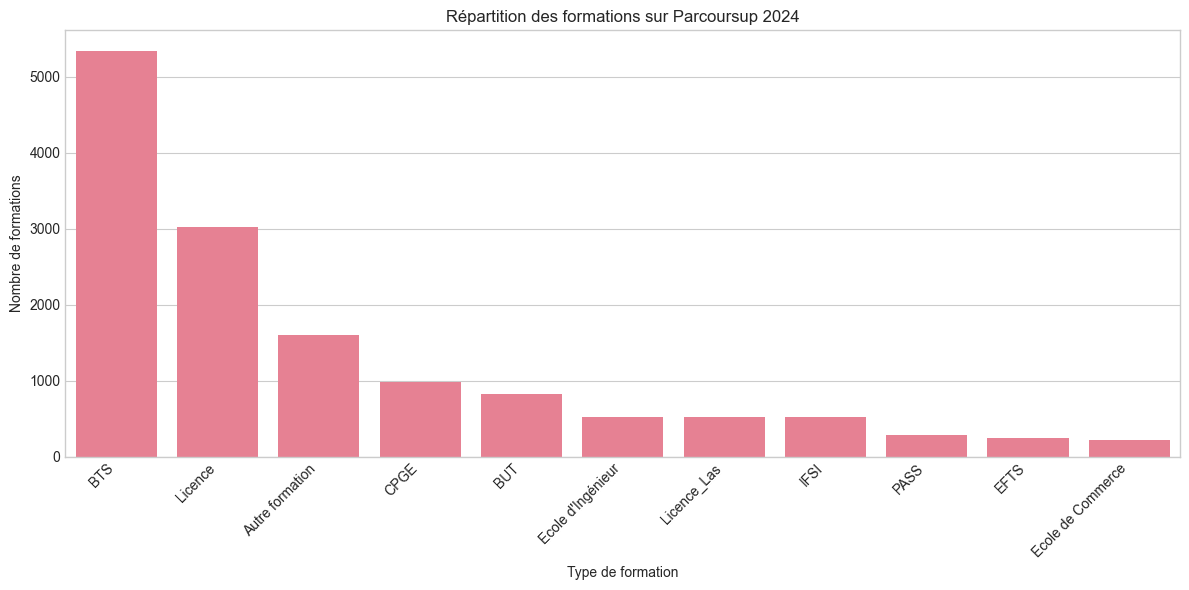


Taux d'accès moyen par type de formation :


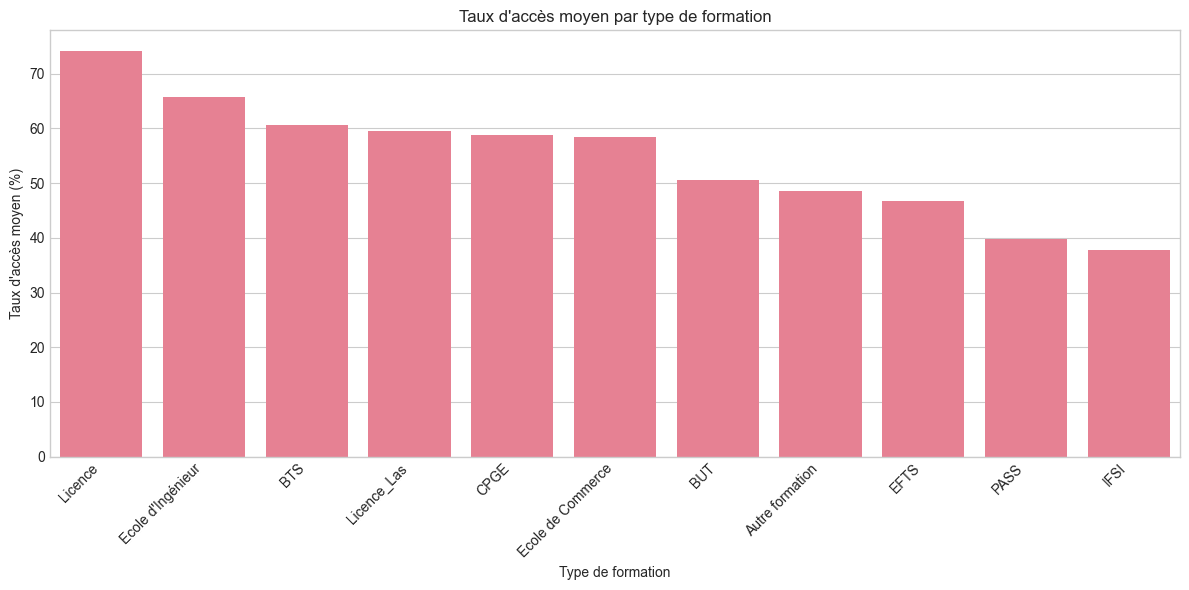

In [44]:
# Répartition des formations par type
formation_type = df['Filière de formation très agrégée'].value_counts()

print("Répartition des formations par type :\n")
print(formation_type)

# Visualisation avec seaborn/matplotlib
sns.barplot(x=formation_type.index, y=formation_type.values)
plt.xlabel('Type de formation')
plt.ylabel('Nombre de formations')
plt.title('Répartition des formations sur Parcoursup 2024')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Visualisation des Taux d'accès (mean et distribution) par type de formation
access_rate_by_type = df.groupby('Filière de formation très agrégée')['Taux d’accès'].mean().sort_values(ascending=False)
print("\nTaux d'accès moyen par type de formation :")

sns.barplot(x=access_rate_by_type.index, y=access_rate_by_type.values)
plt.xlabel('Type de formation')
plt.ylabel("Taux d'accès moyen (%)")
plt.title("Taux d'accès moyen par type de formation")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()



Le taux d'accès des différentes formations est un bon indicateur de la sélectivité de celles-ci.

In [ ]:
# # Filtrer les écoles d'ingénieurs et CPGE scientifiques

df_inge = df[
    (df['Filière de formation très agrégée'] == "Ecole d'Ingénieur") |
    (
        (df['Filière de formation très agrégée'] == "CPGE") &
        (df['Filière de formation.1'] == "Classe préparatoire scientifique")
    )
].copy()

df_inge_inge = df_inge[df_inge['Filière de formation très agrégée'] == "Ecole d'Ingénieur"]
df_inge_cpge = df_inge[df_inge['Filière de formation très agrégée'] == "CPGE"]


print("Nombre de formations donnant Ecole d'Ingénieur : ", len(df_inge_inge))
print("Nombre de formations donnant CPGE scientifique: ", len(df_inge_cpge))

df_inge[df_inge["Établissement"] == "Lycée Pierre De Fermat"]



Nombre de formations donnant Ecole d'Ingénieur :  523
Nombre de formations donnant CPGE scientifique:  487


,Session,"Statut de l’établissement de la filière de formation (public, privé…)",Code UAI de l'établissement,Établissement,Code départemental de l’établissement,Département de l’établissement,Région de l’établissement,Académie de l’établissement,Commune de l’établissement,Filière de formation,Sélectivité,Filière de formation très agrégée,Filière de formation détaillée,Filière de formation.1,Filière de formation détaillée bis,Filière de formation très détaillée,Coordonnées GPS de la formation,Capacité de l’établissement par formation,Effectif total des candidats pour une formation,Dont effectif des candidates pour une formation,Effectif total des candidats en phase principale,Dont effectif des candidats ayant postulé en internat,Effectif des candidats néo bacheliers généraux en phase principale,Dont effectif des candidats boursiers néo bacheliers généraux en phase principale,Effectif des candidats néo bacheliers technologiques en phase principale,Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale,Effectif des candidats néo bacheliers professionnels en phase principale,Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale,Effectif des autres candidats en phase principale,Effectif total des candidats en phase complémentaire,Effectif des candidats néo bacheliers généraux en phase complémentaire,Effectif des candidats néo bacheliers technologique en phase complémentaire,Effectif des candidats néo bacheliers professionnels en phase complémentaire,Effectifs des autres candidats en phase complémentaire,Effectif total des candidats classés par l’établissement en phase principale,Effectif des candidats classés par l’établissement en phase complémentaire,Effectif des candidats classés par l’établissement en internat (CPGE),Effectif des candidats classés par l’établissement hors internat (CPGE),Effectif des candidats néo bacheliers généraux classés par l’établissement,Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement,Effectif des candidats néo bacheliers technologiques classés par l’établissement,Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement,Effectif des candidats néo bacheliers professionnels classés par l’établissement,Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement,Effectif des autres candidats classés par l’établissement,Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement,Effectif total des candidats ayant accepté la proposition de l’établissement (admis),Dont effectif des candidates admises,Effectif des admis en phase principale,Effectif des admis en phase complémentaire,Dont effectif des admis ayant reçu leur proposition d’admission à l'ouverture de la procédure principale,Dont effectif des admis ayant reçu leur proposition d’admission avant le baccalauréat,Dont effectif des admis ayant reçu leur proposition d’admission avant la fin de la procédure principale,Dont effectif des admis en internat,Dont effectif des admis boursiers néo bacheliers,Effectif des admis néo bacheliers,Effectif des admis néo bacheliers généraux,Effectif des admis néo bacheliers technologiques,Effectif des admis néo bacheliers professionnels,Effectif des autres candidats admis,Dont effectif des admis néo bacheliers sans information sur la mention au bac,Dont effectif des admis néo bacheliers sans mention au bac,Dont effectif des admis néo bacheliers avec mention Assez Bien au bac,Dont effectif des admis néo bacheliers avec mention Bien au bac,Dont effectif des admis néo bacheliers avec mention Très Bien au bac,Dont effectif des admis néo bacheliers avec mention Très Bien avec félicitations au bac,Effectif des admis néo bacheliers généraux ayant eu une mention au bac,Effectif des admis néo bacheliers technologiques ayant eu une mention au bac,Effectif des admis néo bacheliers professionnels ayant eu une mention

In [42]:
# Détail des formations :

print("Types de formation en CPGE :")
for f in df_inge_cpge['Filière de formation détaillée bis'].unique():
    print(f"  - {f}")

print("\nTypes de formation en École d'Ingénieur :")
for f in df_inge_inge['Filière de formation détaillée bis'].unique():
    print(f"  - {f}")
df_inge_cpge.head()

# Analyse des écoles d'ingénieurs
print("Taux d'accès = rapport entre le nombre de candidats dont le rang de classement est inférieur ou égal au rang du dernier appelé de son groupe et le nombre de candidats ayant validé un voeu pour la formation étudiée en phase principale \n")
print(f"Taux d'accès des écoles d'ingénieurs : {df_inge_inge['Taux d’accès'].mean():.2f}")
print(f"Écart-type des taux d'accès des écoles d'ingénieurs : {df_inge_inge['Taux d’accès'].std():.2f}")
print(f"Taux d'accès des CPGE : {df_inge_cpge['Taux d’accès'].mean():.2f}")
print(f"Écart-type des taux d'accès des CPGE : {df_inge_cpge['Taux d’accès'].std():.2f}\n")

print(f"Taux d'accès moyens des formations : {df['Taux d’accès'].mean():.2f}")
print(f"Écart-type des taux d'accès des formations : {df['Taux d’accès'].std():.2f}")

# Analyse des CPGE



Types de formation en CPGE :
  - PCSI
  - MPSI
  - TSI
  - BCPST
  - PTSI
  - MP2I
  - TB
  - Ecole normale supérieure Paris Saclay – arts et design
  - TPC

Types de formation en École d'Ingénieur :
  - Formation d'ingénieur Bac + 5
  - Formation Bac + 3
  - Formation Bac + 4
Taux d'accès = rapport entre le nombre de candidats dont le rang de classement est inférieur ou égal au rang du dernier appelé de son groupe et le nombre de candidats ayant validé un voeu pour la formation étudiée en phase principale 

Taux d'accès des écoles d'ingénieurs : 65.74
Écart-type des taux d'accès des écoles d'ingénieurs : 24.55
Taux d'accès des CPGE : 54.83
Écart-type des taux d'accès des CPGE : 25.60

Taux d'accès moyens des formations : 60.12
Écart-type des taux d'accès des formations : 28.67


Les CPGE semblent plus sélectives (taux d'accès moins élevés) que les écoles d'ingénieurs. Mais cela cachent

In [ ]:
#Analyse géographique

# Distribution des formations en fonction de leur région

# Distribution en fonction de leur département



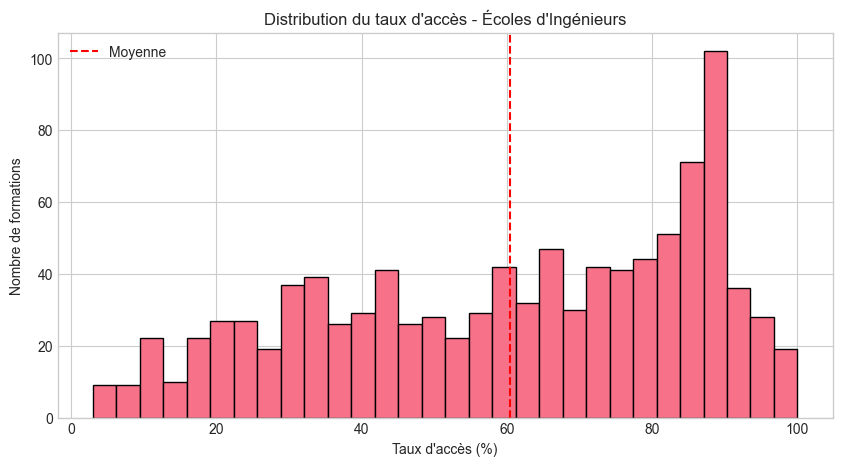

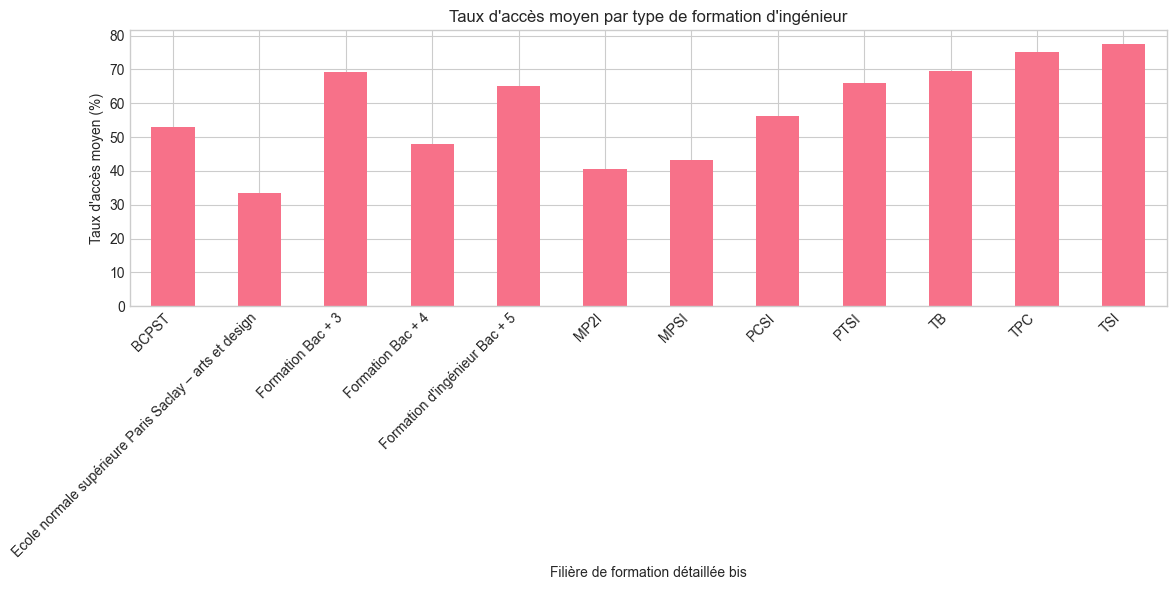

In [56]:
# Analyse de la sélectivité des écoles d'ingénieurs

# Distribution du taux d'accès
plt.figure(figsize=(10, 5))
plt.hist(df_inge['Taux d’accès'], bins=30, edgecolor='black')
plt.xlabel("Taux d'accès (%)")
plt.ylabel('Nombre de formations')
plt.title("Distribution du taux d'accès - Écoles d'Ingénieurs")
plt.axvline(df_inge['Taux d’accès'].mean(), color='red', linestyle='--', label='Moyenne')
plt.legend()
plt.show()

# Comparaison par type de formation
df_inge.groupby('Filière de formation détaillée bis')['Taux d’accès'].mean().plot(kind='bar')
plt.ylabel("Taux d'accès moyen (%)")
plt.title("Taux d'accès moyen par type de formation d'ingénieur")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Statistiques sur la capacité d'accueil :
count    523.000000
mean      48.284895
std       66.597156
min        1.000000
25%       12.000000
50%       25.000000
75%       60.000000
max      662.000000
Name: Capacité de l’établissement par formation, dtype: float64


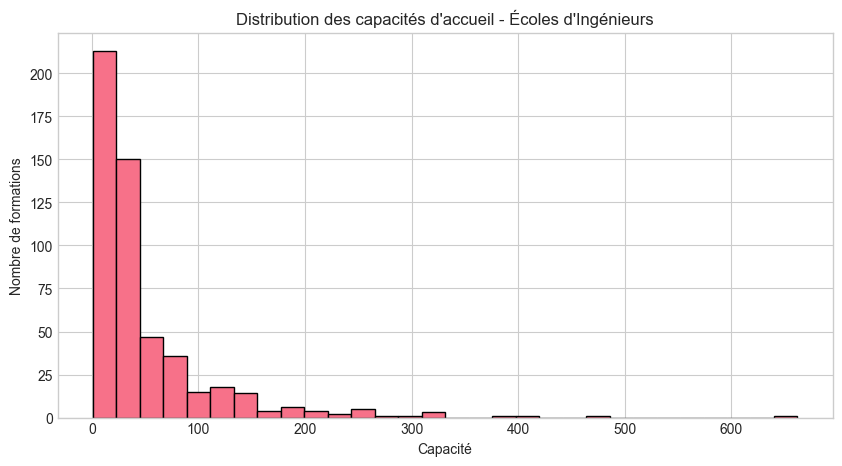

In [ ]:
# Analyse des capacités d'accueil

print("Statistiques sur la capacité d'accueil :")
print(df_inge["Capacité de l’établissement par formation"].describe())

plt.figure(figsize=(10, 5))
plt.hist(df_inge["Capacité de l’établissement par formation"].dropna(), bins=30, edgecolor='black')
plt.xlabel('Capacité')
plt.ylabel('Nombre de formations')
plt.title("Distribution des capacités d'accueil - Écoles d'Ingénieurs")
plt.show()


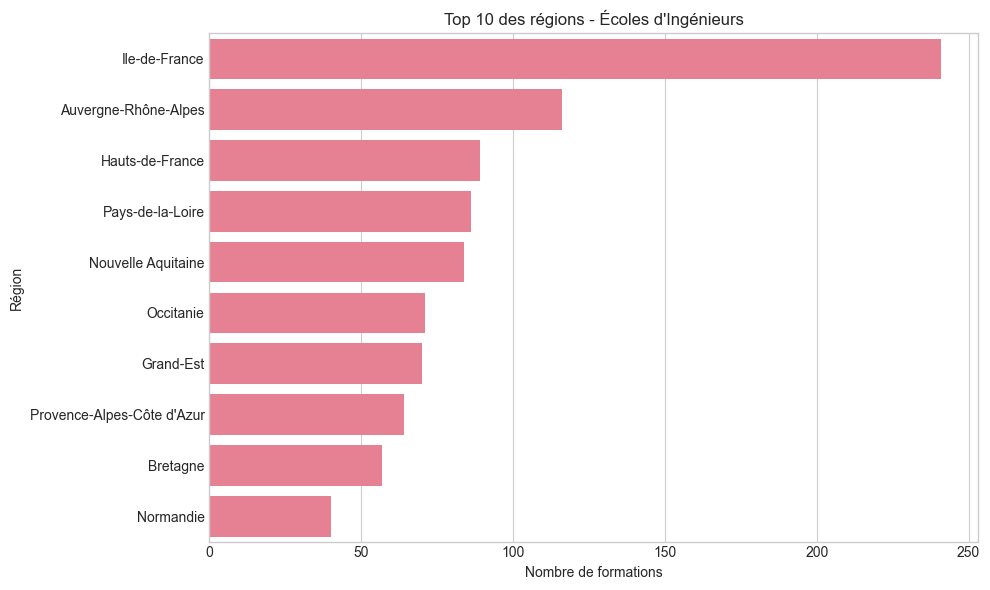

In [57]:
# Analyse géographique : Top 10 des régions

top_regions = df_inge["Région de l’établissement"].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.xlabel('Nombre de formations')
plt.ylabel('Région')
plt.title("Top 10 des régions - Écoles d'Ingénieurs")
plt.tight_layout()
plt.show()


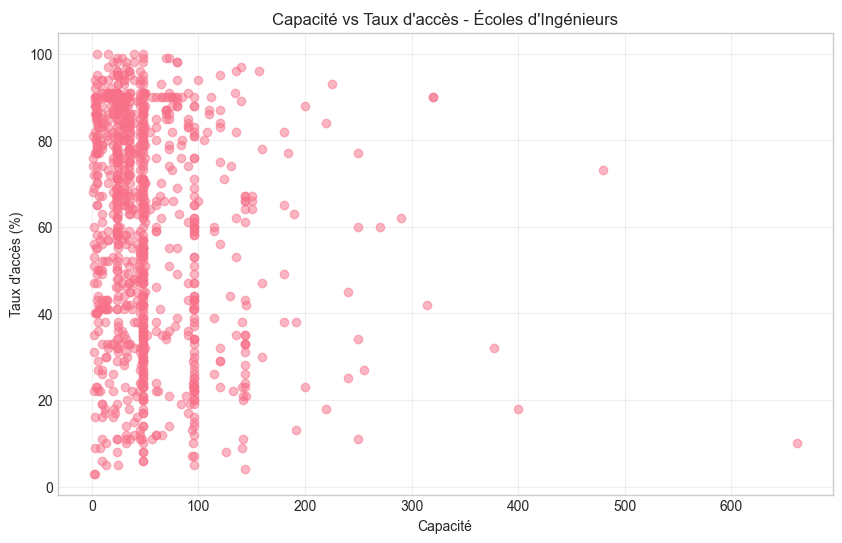

In [58]:
# Relation entre capacité et taux d'accès

plt.figure(figsize=(10, 6))
plt.scatter(df_inge['Capacité de l’établissement par formation'], 
            df_inge['Taux d’accès'], alpha=0.5)
plt.xlabel('Capacité')
plt.ylabel("Taux d'accès (%)")
plt.title("Capacité vs Taux d'accès - Écoles d'Ingénieurs")
plt.grid(True, alpha=0.3)
plt.show()


Pas de corrélation évidentes entre capacité d'accueil et selectivité.